In [55]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from matplotlib import ticker

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# exploring sales.csv

In [3]:
sales_df = pd.read_csv('../../data/sales.csv')
sales_df.DATE_ORDER = sales_df.DATE_ORDER.astype("datetime64")

In [4]:
print("{0} rows".format(len(sales_df)))
sales_df.head()

351091 rows


,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE
0,P6,2015-08-02,1.000,1808.990
1,P6,2015-08-17,1.000,1674.000
2,P6,2015-08-17,1.000,1673.950
3,P6,2015-08-11,1.000,1674.000
4,P6,2015-08-17,1.000,1674.000


### looking at simple data statistics: distributions outliers, etc

In [5]:
# PROD_ID and DATE_ORDER are categorical fields
sales_df.describe(percentiles=[.10,.25, .5, .75,.90,.95,.99,.999,.9999])

,QTY_ORDER,REVENUE
count,351091.000,351091.000
mean,1.079,764.954
std,1.104,781.957
min,1.000,229.000
10%,1.000,435.000
25%,1.000,649.000
50%,1.000,749.000
75%,1.000,799.000
90%,1.000,849.000
95%,1.000,1398.000


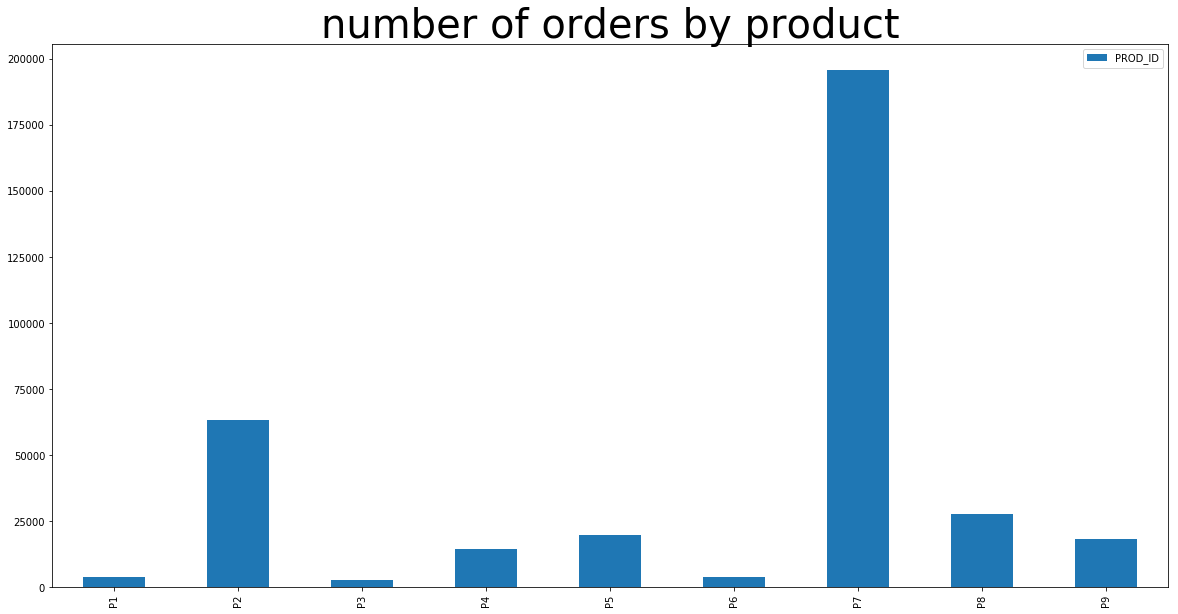

In [6]:
sales_df[["PROD_ID"]].apply(pd.value_counts).sort_index().plot(kind='bar',figsize=(20,10), title="number of orders by product")
fig = plt.gcf()
fig.axes[0].title.set_size(40)

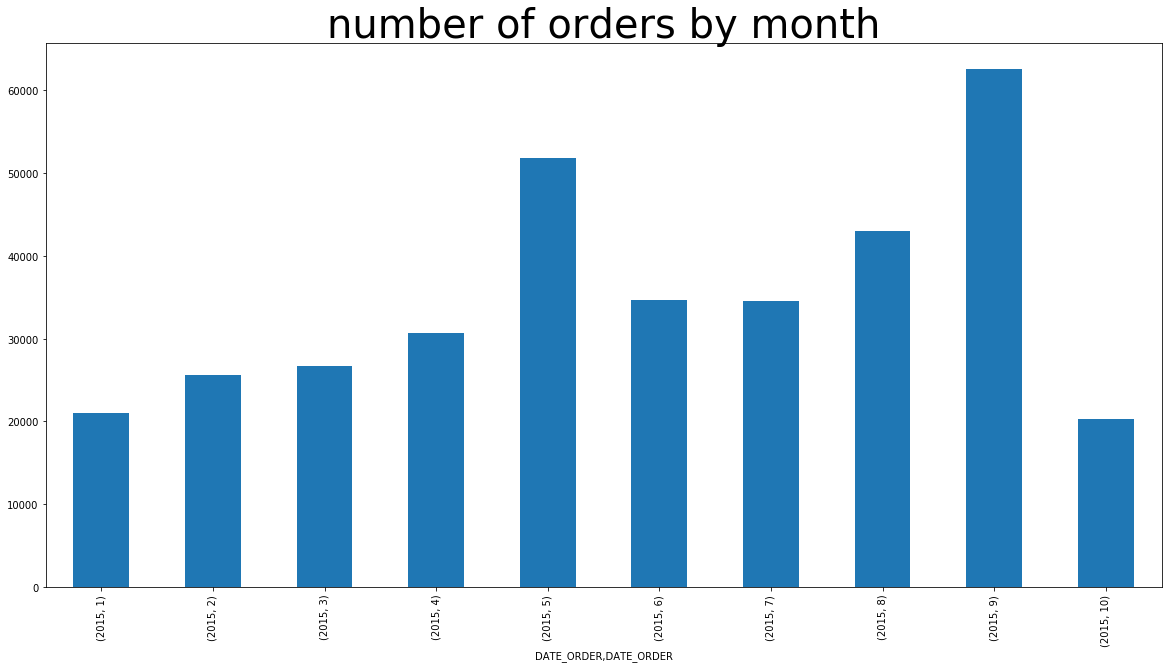

In [7]:
sales_df[["DATE_ORDER"]].groupby([sales_df.DATE_ORDER.dt.year,sales_df.DATE_ORDER.dt.month]).size().plot(kind="bar",figsize=(20,10), title="number of orders by month")
fig = plt.gcf()
fig.axes[0].title.set_size(40)

(0, 1]      335015
(1, 2]       12294
(2, 3]        1475
(3, 4]         499
(4, 5]        1302
(5, inf]       506
Name: QTY_ORDER, dtype: int64


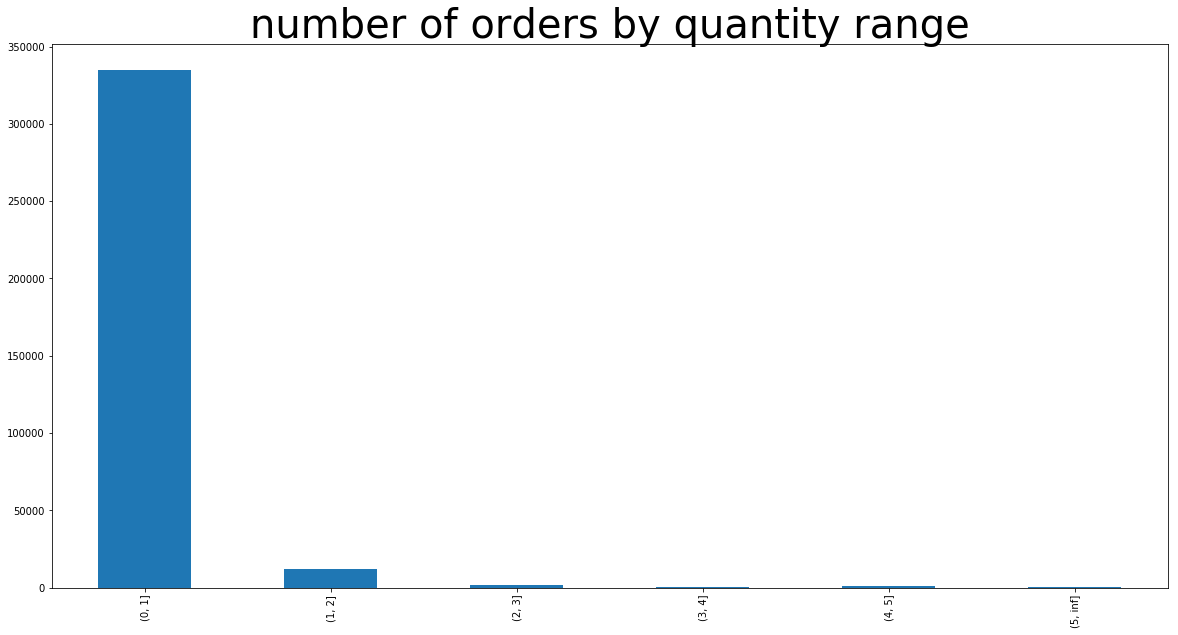

In [8]:
vc=pd.value_counts(pd.cut(sales_df["QTY_ORDER"],bins=[0,1,2,3,4,5,np.inf]))
vc.sort_index().plot(kind='bar',figsize=(20,10), title="number of orders by quantity range")
print(vc.sort_index())
fig = plt.gcf()
fig.axes[0].title.set_size(40)

(0, 500]            54010
(500, 1000]        272298
(1000, 1500]        14918
(1500, 2000]         6607
(2000, 5000]         3060
(5000, 10000]         125
(10000, 100000]        72
(100000, inf]           1
Name: REVENUE, dtype: int64


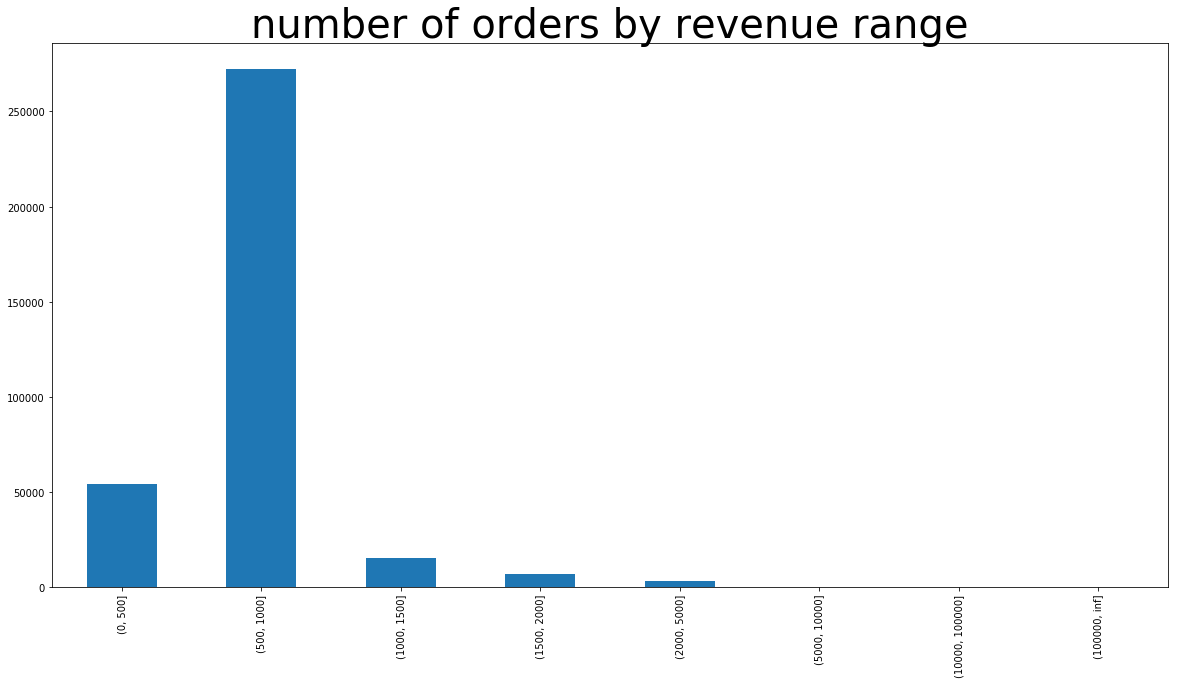

In [9]:
fig = plt.gcf()
vc=pd.value_counts(pd.cut(sales_df["REVENUE"],bins=[0,500,1000,1500,2000,5000,10000,100000,np.inf]))

print(vc.sort_index())

vc.sort_index().plot(kind='bar',figsize=(20,10), title="number of orders by revenue range")
fig.axes[0].title.set_size(40)

### totals per product, per month

In [10]:
sales_df.groupby([sales_df.PROD_ID, sales_df.DATE_ORDER.dt.month]).sum()

QTY_ORDER      REVENUE
PROD_ID DATE_ORDER                        
P1      2             307.000   436424.720
        3             791.000  1100141.380
        4             354.000   505790.410
        5             666.000   938421.960
        6             503.000   726061.930
        7             478.000   709417.910
        8             341.000   506840.380
        9             504.000   749076.150
        10            229.000   341921.900
P2      1            4228.000  3379743.290
        2            2286.000  1878595.040
        3            7799.000  5671868.610
        4           10664.000  7561514.400
        5           10355.000  6959280.150
        6            6753.000  4441458.200
        7            3654.000  2475906.890
        8           10502.000  6461727.960
        9            9032.000  5629908.830
        10           2571.000  1557481.820
P3      2             149.000   219296.580
        3             565.000   795431.120
        4             409.000   540607.560
        5             359.000   464140.920
        6             253.000   312887.560
        7             811.000   898459.450
        8             153.000   180642.840
        9             193.000   235685.090
        10             57.000    67018.830
P4      3              22.000    12432.650
        4            1703.000   961363.250
...                       ...          ...
P6      7             169.000   287664.360
        8             181.000   301820.870
        9             977.000  1396235.990
        10            202.000   297797.500
P7      1           17501.000 14286786.250
        2           23390.000 19161745.390
        3           18599.000 15237796.310
        4           17435.000 14104482.340
        5           32743.000 24857731.170
        6           25399.000 19014895.850
        7           23711.000 17599940.730
        8           18411.000 12980475.010
        9           27822.000 19284461.620
        10           6711.000  4713827.050
P8      3             190.000   107138.630
        4             929.000   462064.220
        5            3144.000  1428978.150
        6            1520.000   729738.420
        7            2532.000  1121301.590
        8            6983.000  2695647.680
        9            9557.000  3674420.640
        10           4965.000  1938391.080
P9      3             141.000    79530.960
        4             663.000   328203.770
        5            2251.000  1038811.180
        6             575.000   278084.050
        7             512.000   231101.680
        8            5764.000  2259495.610
        9            7160.000  2753604.280
        10           2595.000  1010070.000

[79 rows x 2 columns]

- `.unstack` pivots the inner aggregations so that I can plot every product in a single month

- There's a way to rename the columns after running `.groupby` (i.e. using "month" rather than the current "DATE_ORDER") but it's cumbersome and I don't think it's needed here: http://stackoverflow.com/a/19078773/436721

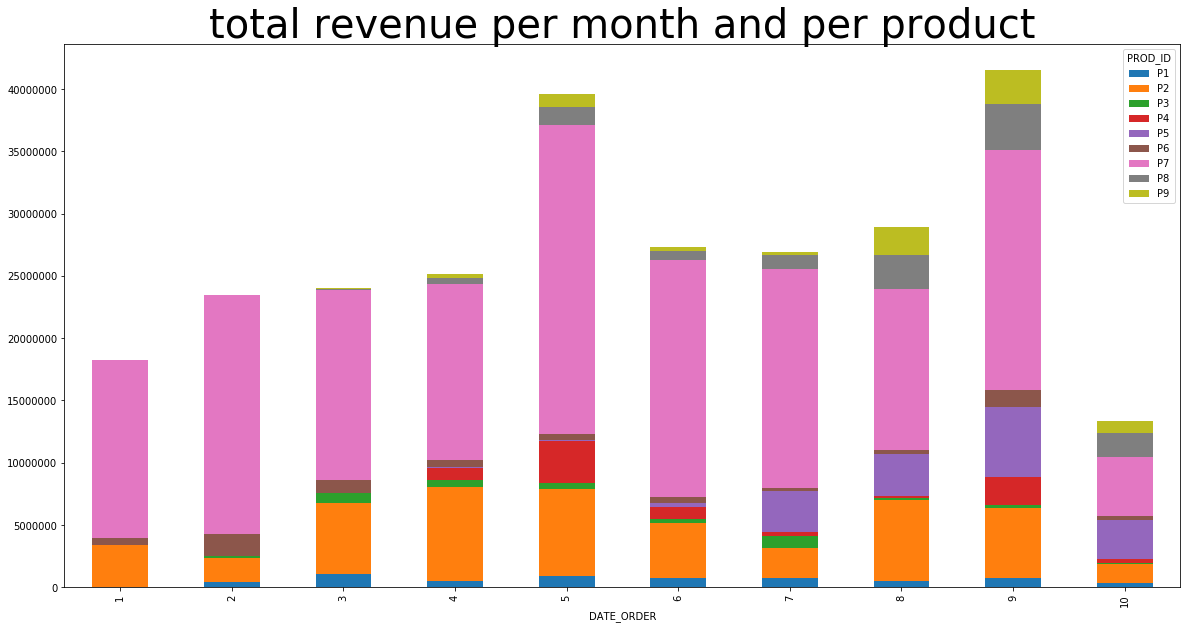

In [69]:
sales_df.groupby([sales_df.DATE_ORDER.dt.month, sales_df.PROD_ID])["REVENUE"].sum().unstack('PROD_ID').plot(kind='bar',stacked=True,figsize=(20,10),title='total revenue per month and per product')
fig = plt.gcf()
fig.axes[0].title.set_size(40)

# no scientific notation
ax = plt.gca()
ax.yaxis.major.formatter.set_scientific(False)

# exploring comp_prices.csv

In [230]:
comp_df = pd.read_csv('../../data/comp_prices.csv')
comp_df.DATE_EXTRACTION = comp_df.DATE_EXTRACTION.astype("datetime64")
comp_df.PAY_TYPE = comp_df.PAY_TYPE.astype(str)

In [231]:
print("{0} rows".format(len(comp_df)))
comp_df.head()

50114 rows


,PROD_ID,DATE_EXTRACTION,COMPETITOR,COMPETITOR_PRICE,PAY_TYPE
0,P6,2015-01-30 08:11:38,C3,1898.000,1
1,P6,2015-01-30 08:11:38,C1,1898.000,1
2,P6,2015-01-30 08:11:38,C6,1999.900,1
3,P6,2015-01-31 20:10:14,C2,1894.880,2
4,P6,2015-01-31 20:10:14,C3,1894.880,2


In [232]:
# PROD_ID,DATE_EXTRACTION, COMPETITOR and PAY_TYPE are categorical fields
comp_df.groupby([comp_df.COMPETITOR,comp_df.PROD_ID]).describe(percentiles=[.10,.25, .5, .75,.90,.95,.99,.999,.9999])

COMPETITOR_PRICE
COMPETITOR PROD_ID                         
C1         P1      count            765.000
                   mean            1871.916
                   std             7140.431
                   min             1090.000
                   10%             1319.120
                   25%             1396.900
                   50%             1469.020
                   75%             1499.000
                   90%             1899.000
                   95%             1899.000
                   99%             1899.000
                   99.9%         136157.168
                   99.99%        148525.717
                   max           149900.000
           P2      count           1122.000
                   mean             832.437
                   std             2881.658
                   min              539.100
                   10%              610.000
                   25%              652.987
                   50%              699.000
                   75%              786.997
                   90%              828.000
                   95%              829.000
                   99%              829.900
                   99.9%          57459.351
                   99.99%         71685.275
                   max            72498.000
           P3      count           1646.000
                   mean            1328.234
...                                     ...
C6         P7      99.99%           879.000
                   max              879.000
           P8      count           1149.000
                   mean             533.014
                   std             1649.063
                   min              399.990
                   10%              428.000
                   25%              439.000
                   50%              469.000
                   75%              493.980
                   90%              497.980
                   95%              509.000
                   99%              534.990
                   99.9%          34158.624
                   99.99%         39999.000
                   max            39999.000
           P9      count           1137.000
                   mean             533.670
                   std             1657.731
                   min              399.990
                   10%              428.000
                   25%              439.000
                   50%              469.000
                   75%              493.780
                   90%              495.958
                   95%              525.000
                   99%              535.634
                   99.9%          34632.168
                   99.99%         39999.000
                   max            39999.000

[644 rows x 1 columns]

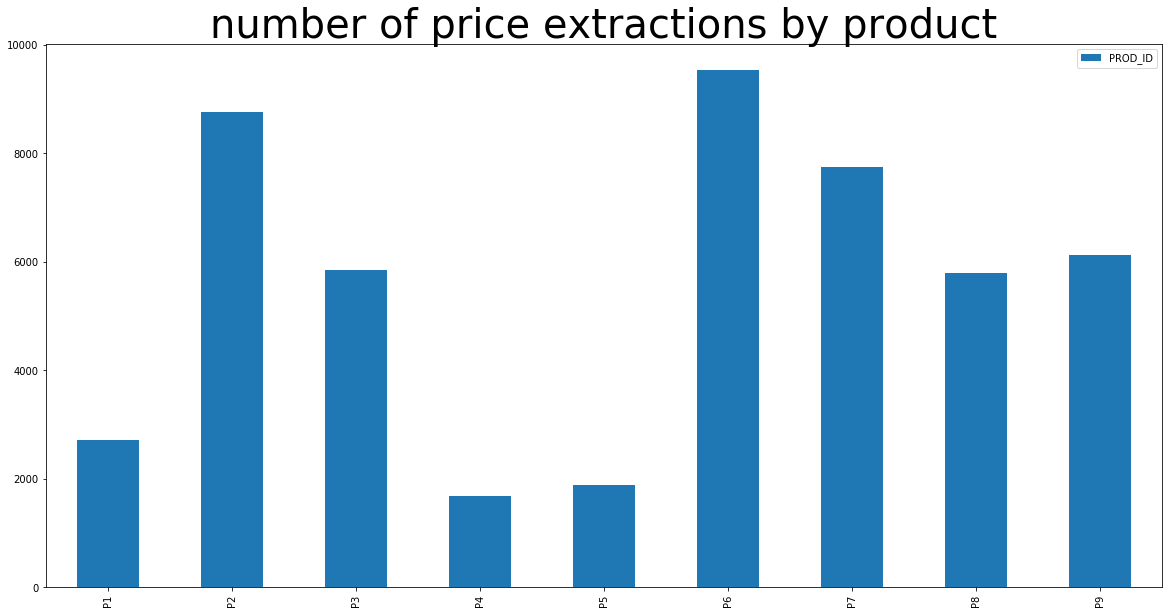

In [319]:
comp_df[["PROD_ID"]].apply(pd.value_counts).sort_index().plot(kind='bar',figsize=(20,10), title="number of price extractions by product")
fig = plt.gcf()
fig.axes[0].title.set_size(40)

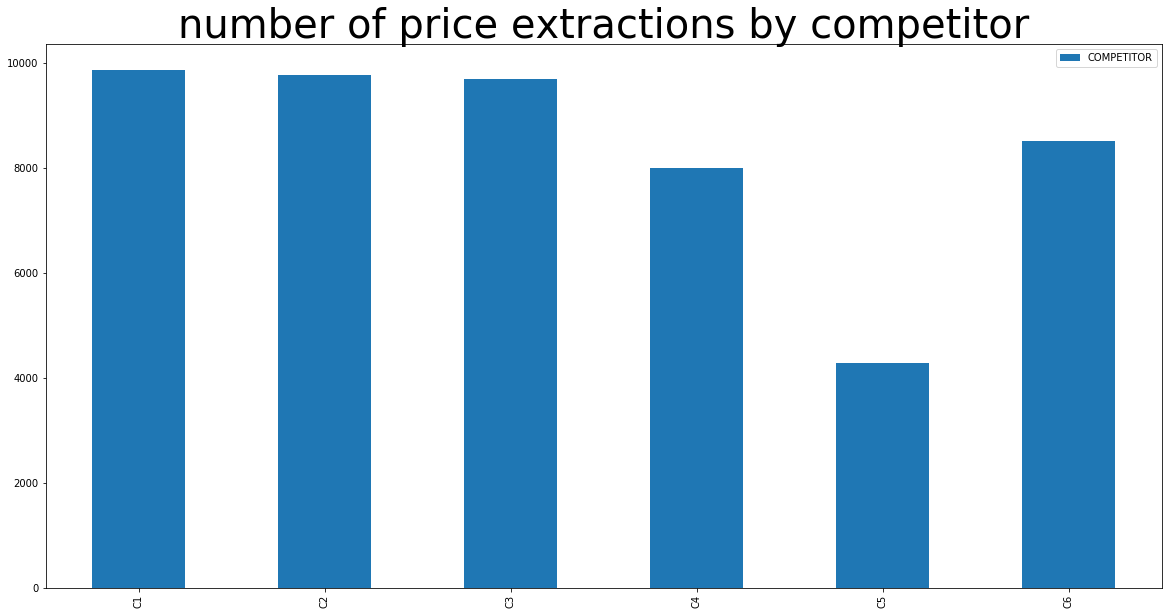

In [318]:
comp_df[["COMPETITOR"]].apply(pd.value_counts).sort_index().plot(kind='bar',figsize=(20,10), title="number of price extractions by competitor")
fig = plt.gcf()
fig.axes[0].title.set_size(40)

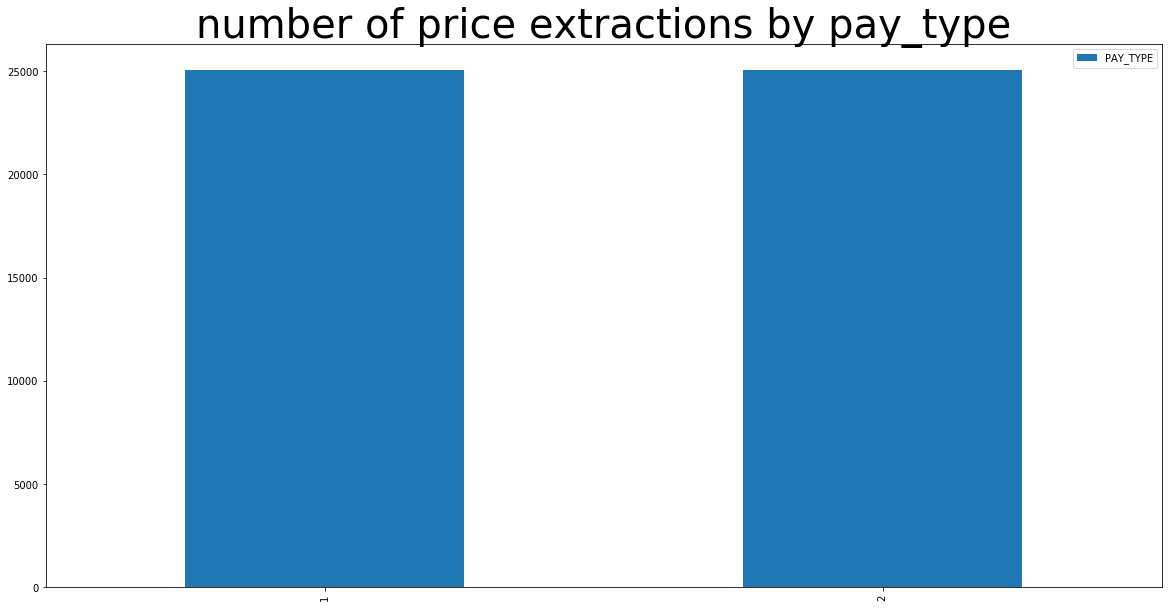

In [320]:
comp_df[["PAY_TYPE"]].apply(pd.value_counts).sort_index().plot(kind='bar',figsize=(20,10), title="number of price extractions by pay_type")
fig = plt.gcf()
fig.axes[0].title.set_size(40)